In [1]:
import paths
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [4]:
import data

In [7]:
self_to_self=pd.read_csv(data.EXP_self_to_self.path)

In [8]:
ods_mapping=pd.read_csv(
    data.GP_ODS_Data.path,
    names=data.GP_ODS_Data.columns,
    index_col="ODSCode",
    usecols=["ODSCode","Name","NationalGrouping","HighLevelHealthGeography","Postcode",
             "PrescribingSetting","ContactTelephoneNumber"]
)

In [9]:
self_to_self.columns

Index(['RequestorODS', 'month', 'requestor_supplier', 'registration_count',
       'retry_count', 'retry_rate'],
      dtype='object')

In [10]:
def select_supplier(supplier):
    return lambda df: df["requestor_supplier"] == supplier

(0, 800)

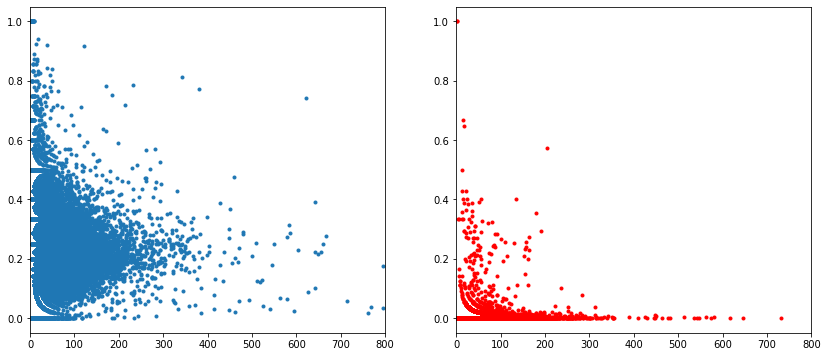

In [18]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(
    self_to_self.loc[select_supplier("EMIS")]["registration_count"],
    self_to_self.loc[select_supplier("EMIS")]["retry_rate"],
    ".",
    linestyle=""
)
plt.xlim((0, 800))

plt.subplot(1,2,2)
plt.plot(
    self_to_self.loc[select_supplier("TPP")]["registration_count"],
    self_to_self.loc[select_supplier("TPP")]["retry_rate"],
    "r.",
    linestyle=""
)
plt.xlim((0, 800))

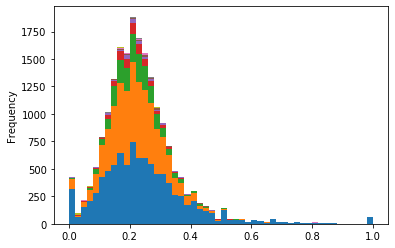

In [84]:
bins = pd.IntervalIndex.from_tuples([(x, x+50) for x in range(0, 400, 50)])

(self_to_self
 .loc[select_supplier("EMIS")]
 .assign(reg_cat=lambda df: pd.cut(df["registration_count"], bins=bins).values.add_categories("missing"))
 .fillna("missing")
 .pivot(columns="reg_cat", values="retry_rate")
).plot.hist(stacked=True, bins=50, legend=False)

In [86]:
def number_of_registrations_within(lower, upper):
    return lambda df: (df["registration_count"] > lower) & (df["registration_count"] < upper)

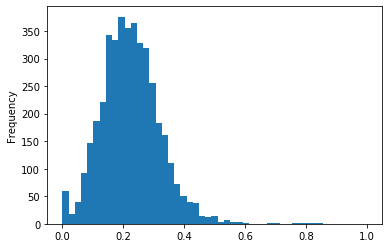

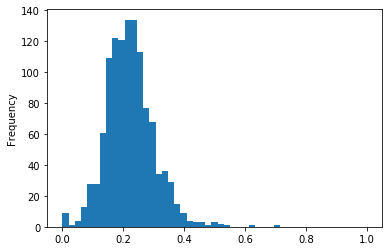

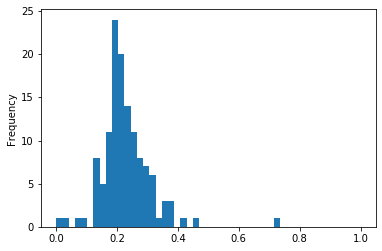

In [102]:
(self_to_self
 .loc[select_supplier("EMIS")]
 .loc[number_of_registrations_within(40, 60)]
)[["retry_rate"]].plot.hist(bins=np.linspace(0, 1, 50), legend=False)

(self_to_self
 .loc[select_supplier("EMIS")]
 .loc[number_of_registrations_within(100, 120)]
)[["retry_rate"]].plot.hist(bins=np.linspace(0, 1, 50), legend=False)

(self_to_self
 .loc[select_supplier("EMIS")]
 .loc[number_of_registrations_within(200, 220)]
)[["retry_rate"]].plot.hist(bins=np.linspace(0, 1, 50), legend=False)

In [50]:
bins = pd.IntervalIndex.from_tuples([(x, x+50) for x in range(0, 800, 50)])

(self_to_self
 .loc[select_supplier("EMIS")]
 .assign(reg_cat=lambda df: pd.cut(df["registration_count"], bins=bins))
 .pivot(columns="reg_cat", values="retry_rate")
)

reg_cat,NaN,"(0.0, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]","(300.0, 350.0]","(350.0, 400.0]","(400.0, 450.0]","(450.0, 500.0]","(500.0, 550.0]","(550.0, 600.0]","(600.0, 650.0]","(650.0, 700.0]","(700.0, 750.0]","(750.0, 800.0]"
25,NaN,0.348837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,0.406250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,0.327586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,0.421053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,0.259259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32571,NaN,NaN,NaN,0.056738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32572,NaN,NaN,NaN,0.092437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32573,NaN,NaN,0.123288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32574,NaN,NaN,NaN,0.121429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
def select_practice(ods):
    return lambda df: df["RequestorODS"] == ods

In [82]:
self_to_self.loc[select_practice("M86046")]

,RequestorODS,month,requestor_supplier,registration_count,retry_count,retry_rate
25748,M86046,4,EMIS,28,6,0.214286
25749,M86046,5,EMIS,45,16,0.355556
25750,M86046,6,EMIS,31,9,0.290323
25751,M86046,7,EMIS,57,18,0.315789
25752,M86046,8,EMIS,46,7,0.152174


In [80]:
(ods_mapping
 .loc[lambda df: df["Name"].str.contains("BRIDGE END")])

,Name,NationalGrouping,HighLevelHealthGeography,Postcode,ContactTelephoneNumber,PrescribingSetting
ODSCode,,,,,,
A83009,BRIDGE END SURGERY,Y63,Q74,DH3 3SL,0191 3883236,4


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12c86d1d0>,
      dtype=object)

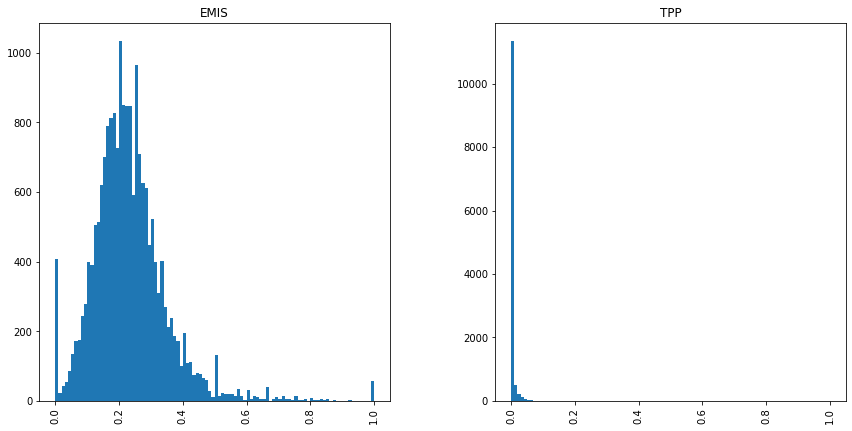

In [123]:
(self_to_self
 .loc[(self_to_self["requestor_supplier"] == "EMIS") |
     (self_to_self["requestor_supplier"] == "TPP")]
)[["requestor_supplier", "retry_rate"]].hist(by="requestor_supplier", bins=100, figsize=(14, 7))

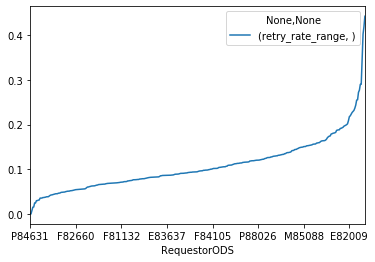

In [220]:
rr_range = (
    self_to_self
    .loc[select_supplier("EMIS")]
    .groupby(by="RequestorODS")
    .agg({"retry_rate": ["min", "max"], "registration_count": ["min"]})
    .loc[lambda df: df[("registration_count", "min")] > 100]
    .assign(retry_rate_range=lambda df: df[("retry_rate", "max")] - df[("retry_rate", "min")])
    .sort_values(by="retry_rate_range", ascending=True)
)[[("retry_rate_range", "")]].plot()

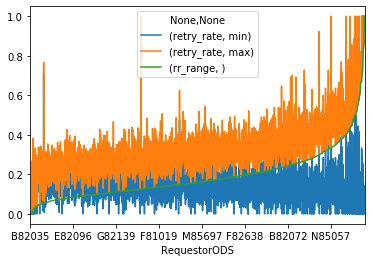

In [211]:
(self_to_self
 .loc[select_supplier("EMIS")]
 .groupby(by="RequestorODS").agg({"retry_rate": ["min", "max"], "month": ["count"]})
 .loc[lambda df: df[("month", "count")] == 5]
 .assign(rr_range=lambda df: df[("retry_rate", "max")] - df[("retry_rate", "min")])
 .sort_values(by="rr_range", ascending=True)
)[[("retry_rate", "min"), ("retry_rate", "max"), ("rr_range", "")]].plot()

In [175]:
self_to_self.loc[select_practice("Y03079")]

,RequestorODS,month,requestor_supplier,registration_count,retry_count,retry_rate
32252,Y03079,4,EMIS,92,22,0.239130
32253,Y03079,5,EMIS,87,21,0.241379
32254,Y03079,6,EMIS,89,23,0.258427
32255,Y03079,7,EMIS,241,124,0.514523
32256,Y03079,8,EMIS,99,33,0.333333
